In [1]:
from __future__ import print_function, division
from sympy import symbols
from sympy.core import S, pi, Rational
from sympy.functions import sqrt, exp, factorial, gamma, tanh
from sympy.functions import assoc_laguerre as L
from sympy.functions import assoc_legendre as P
from sympy.physics.quantum.constants import hbar

from sympy import init_printing
init_printing()

## Morse potential

The [Morse potential](https://en.wikipedia.org/wiki/Morse_potential) is given by

$$ V(x) = D_e [1 - e^{-a(r-r_e)}])$$

In [2]:
x, lam = symbols("x lambda")
n = symbols("n", integer=True)

In [3]:
def morse_psi_n(n, x, lam, xe):
    Nn = sqrt((factorial(n)*(2*lam - 2*n - 10))/gamma(2*lam - n))
    z = 2*lam*exp(-(x - xe))
    psi = Nn*z**(lam - n -S(1)/2) * exp(-S(1)/2*z) * L(n, 2*lam - 2*n - 1, z)
    return psi    

In [4]:
def morse_E_n(n, lam):
    return 1 - 1/lam**2*(lam - n - S(1)/2)**2   

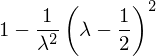

In [5]:
morse_E_n(0, lam)

In [6]:
from sympy.functions import cosh

## Pöschl-Teller potential


The [Pösch-Teller potential](https://en.wikipedia.org/wiki/P%C3%B6schl%E2%80%93Teller_potential) is given by

$$ V(x) = -\frac{\lambda(\lambda + 1)}{2} \operatorname{sech}^2(x)$$

In [7]:
def posch_teller_psi_n(n, x, lam):
    psi = P(lam, n, tanh(x))
    return psi

In [8]:
posch_teller_psi_n(n, x, lam)

In [9]:
def morse_E_n(n, lam):
    if n <= lam:
        return -n**2/ 2
    else:
        raise ValueError("Lambda should not be greater than n.")

In [10]:
morse_E_n(5, 6)

### References

- Pöschl, G.; Teller, E. (1933). "Bemerkungen zur Quantenmechanik des anharmonischen Oszillators". Zeitschrift für Physik 83 (3–4): 143–151. doi:10.1007/BF01331132.

- Siegfried Flügge Practical Quantum Mechanics (Springer, 1998)
Lekner, John (2007). "Reflectionless eigenstates of the sech2 potential". American Journal of Physics 875 (12): 1151–1157. doi:10.1119/1.2787015.

In [11]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()